In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.figure
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [2]:
titanic = pd.read_csv("C:/Users/AULA04/Desktop/Codes/Curso/Data/titanic.csv")
titanic_org = titanic
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic = titanic_org

## Exploration Data

In [4]:
#Cuantas personas murieron dependiendo de la clase a la que pertenecen?
titanic.groupby(["Pclass", "Survived"]).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


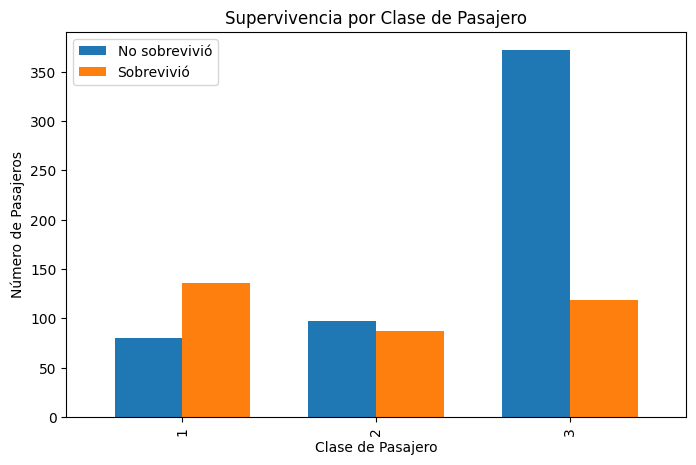

In [5]:
# Contar cuántas personas sobrevivieron y cuántas no por clase
survival_counts = titanic.groupby(["Pclass", "Survived"]).size().unstack()

# Crear gráfico de barras agrupadas
survival_counts.plot(kind="bar", figsize=(8,5), width=0.7)

# Configurar etiquetas y título
plt.xlabel("Clase de Pasajero")
plt.ylabel("Número de Pasajeros")
plt.title("Supervivencia por Clase de Pasajero")
plt.legend(["No sobrevivió", "Sobrevivió"], loc="best")

plt.show()


Sex,female,male
Survived,,
0,81,468
1,233,109


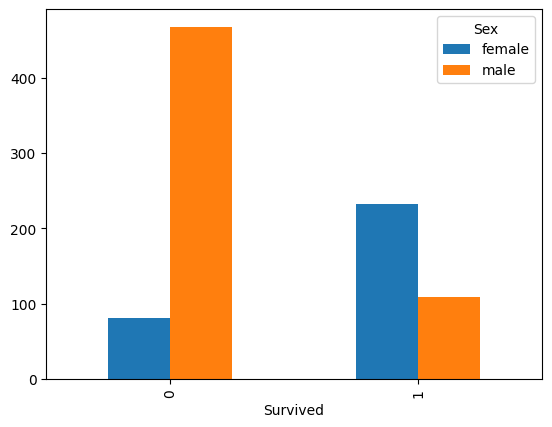

In [6]:
titanic_org.groupby(["Survived","Sex"]).size().unstack().plot(kind="bar")

titanic_org.groupby(["Survived","Sex"]).size().unstack()

## PreProcessing Data

Deleted:
* PassengerId
* Name
* Ticket

* Cabin: Possible use

In [7]:
titanic = titanic.drop("PassengerId",axis=1)
titanic = titanic.drop("Name",axis=1)
titanic = titanic.drop("Ticket",axis=1)
titanic = titanic.drop("Cabin",axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Gender

In [8]:
titanic = pd.concat([titanic,pd.get_dummies(titanic.Sex,prefix=titanic.Sex.name,prefix_sep='_',drop_first=True)*1],axis=1)
titanic = titanic.drop("Sex",axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,NaN,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


Embarked

In [9]:
label_encoder = preprocessing.LabelEncoder() 
titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked'])
titanic

titanic = pd.concat([titanic,pd.get_dummies(titanic.Embarked,prefix=titanic.Embarked.name,prefix_sep='_',drop_first=True)*1],axis=1)
titanic = titanic.drop("Embarked",axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_1,Embarked_2,Embarked_3
0,0,3,22.0,1,0,7.2500,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,0
888,0,3,NaN,1,2,23.4500,0,0,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0


Age

In [10]:
titanic.Age = titanic.Age.fillna(titanic["Age"].mean())

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int32  
 7   Embarked_1  891 non-null    int32  
 8   Embarked_2  891 non-null    int32  
 9   Embarked_3  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


## Division dataset

In [12]:
y = titanic["Survived"]
x = titanic.drop(columns=["Survived"])

In [13]:
#Get the 10% of the X total for the test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)
#Get the 20% of the 90% train data 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

print(f"Train: {len(X_train)} ")
print(f"Valid: {len(X_valid)} ")
print(f"Test: {len(X_test)} ") 

Train: 640 
Valid: 161 
Test: 90 


### Normalize

In [14]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_1,Embarked_2,Embarked_3
592,3,47.00,0,0,7.2500,1,0,1,0
821,3,27.00,0,0,8.6625,1,0,1,0
493,1,71.00,0,0,49.5042,1,0,0,0
43,2,3.00,1,2,41.5792,0,0,0,0
583,1,36.00,0,0,40.1250,1,0,0,0
...,...,...,...,...,...,...,...,...,...
644,3,0.75,2,1,19.2583,0,0,0,0
357,2,38.00,0,0,13.0000,0,0,1,0
56,2,21.00,0,0,10.5000,0,0,1,0
655,2,24.00,2,0,73.5000,1,0,1,0


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=x.columns)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_1,Embarked_2,Embarked_3
0,1.0,0.585323,0.000,0.000000,0.014151,1.0,0.0,1.0,0.0
1,1.0,0.334004,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0
2,0.0,0.886906,0.000,0.000000,0.096626,1.0,0.0,0.0,0.0
3,0.5,0.032420,0.125,0.333333,0.081157,0.0,0.0,0.0,0.0
4,0.0,0.447097,0.000,0.000000,0.078319,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
635,1.0,0.004147,0.250,0.166667,0.037590,0.0,0.0,0.0,0.0
636,0.5,0.472229,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0
637,0.5,0.258608,0.000,0.000000,0.020495,0.0,0.0,1.0,0.0
638,0.5,0.296306,0.250,0.000000,0.143462,1.0,0.0,1.0,0.0


In [16]:
scaler = MinMaxScaler()
def crear_normalize_dataframe(dataframe, ):
    columns_dataframe=dataframe.columns
    dataframe_Normalize = scaler.fit_transform(dataframe)
    dataframe_Normalize = pd.DataFrame(dataframe_Normalize, columns_dataframe)
    return dataframe_Normalize

def normalize_dataframe_test(dataframe, ):
    columns_dataframe=dataframe.columns
    dataframe_Normalize = scaler.transform(dataframe)
    dataframe_Normalize = pd.DataFrame(dataframe_Normalize, columns_dataframe)
    return dataframe_Normalize

Function to comparate

In [25]:
def plot_metrics(
        model_name: str,
        y_pred: pd.Series,
        y_test: pd.Series,
        figure: tuple[matplotlib.figure.Figure, np.array] = None
):
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall_, precision_)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    if figure is None:
        fig, ax = plt.subplots(1,2, figsize=(14,7))
    else:
        fig, ax = figure
    
    ax[0].plot(recall_, precision_, label=f"{model_name}: AUC:{pr_auc:.2f}")
    ax[0].set_xlabel("recall")
    ax[0].set_ylabel("precision")
    ax[0].set_title(F"precision-recall Curve")
    ax[0].legend()

    ax[1].plot(fpr,tpr,label=f"AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("FPR")
    ax[1].set_ylabel("TPR")
    ax[1].set_title(f"ROC Curve")
    ax[1].legend()

Function for the result

### Baseline Probablity by sex

In [134]:
len(y_train)

640

0.1234375

In [ ]:
#for person in titanic_normalized:
Rate_sex_survived = pd.DataFrame(titanic_org.groupby(["Sex"])["Survived"].sum() / titanic_org["Survived"].sum())
Rate_sex_survived*100

female = float(Rate_sex_survived.loc["female"])
male = float(Rate_sex_survived.loc["male"])


C:\Users\AULA04\AppData\Local\Temp\ipykernel_9820\2467297485.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  female = float(Rate_sex_survived.loc["female"])
C:\Users\AULA04\AppData\Local\Temp\ipykernel_9820\2467297485.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  male = float(Rate_sex_survived.loc["male"])


530    1
401    0
433    0
241    1
773    0
      ..
369    1
553    0
115    0
752    0
690    0
Length: 90, dtype: int32

In [173]:
from sklearn.base import BaseEstimator

# Definir un modelo "customizado" de baseline basado en una condición
class Baseline_sex(BaseEstimator):
    def __init__(self):
        self.male_percentage = None
        self.female_percentage = None
    
    def fit(self, train_x_baseline, train_y_baseline):
        
        self.female_percentage = train_x_baseline["female"][train_y_baseline == 1].sum() / (len(train_y_baseline))
        self.male_percentage = train_x_baseline["male"][train_y_baseline == 1].sum() / (len(train_y_baseline))

        return self
    
    def predict(self, X):
        # Asignar porcentaje de acuerdo con la columna 'gender'
        predictions = np.where(X['male'] == 1, self.male_percentage,self.female_percentage)

        predictions = (predictions >= self.female_percentage).astype(int)

        return pd.Series(predictions)

In [174]:
model_baseline = Baseline_sex()

model_baseline.fit(X_train,y_train)

Baseline_sex()

In [175]:
y_pred_baseline = model_baseline.predict(X_test)
y_pred_baseline

0     1
1     0
2     0
3     1
4     0
     ..
85    1
86    0
87    0
88    0
89    0
Length: 90, dtype: int32

In [176]:
print("Evaluación en Validación:\n", classification_report(y_pred_baseline, y_test))

Evaluación en Validación:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        57
           1       0.66      0.70      0.68        33

    accuracy                           0.76        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.76      0.76      0.76        90



In [180]:
cross_val_score(model_baseline, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7828125

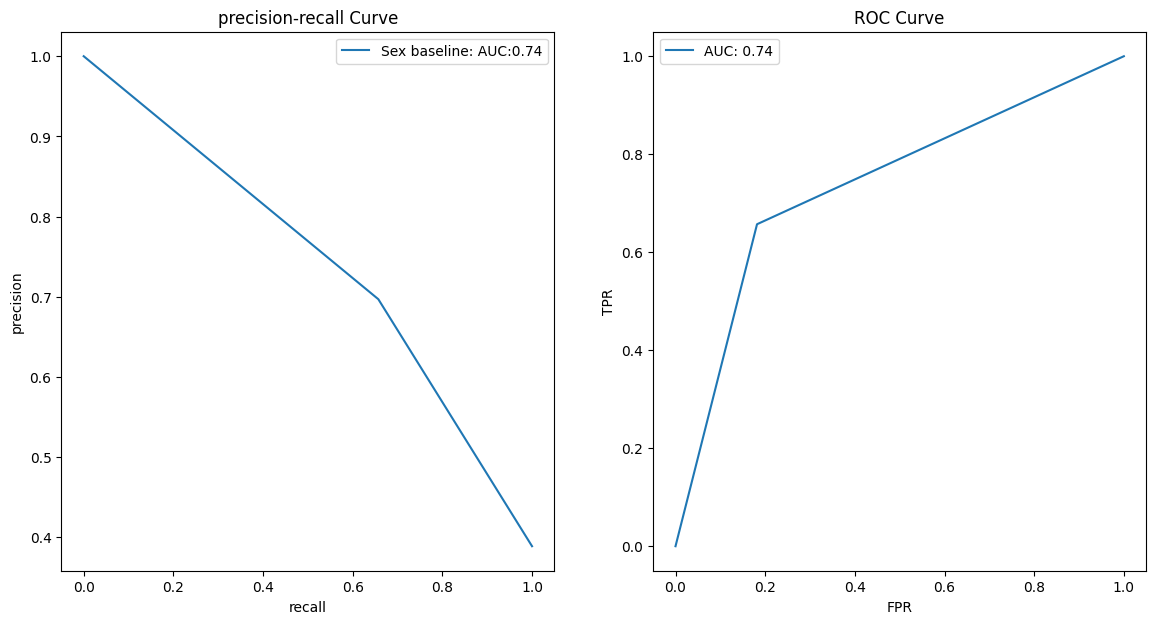

In [ ]:
plot_metrics("Sex baseline", y_pred=y_pred_baseline, y_test=y_test)

In [ ]:
cross_val_score("", x, y, cv=10).mean()

### Regresion logistica

In [17]:
model_log_res = LogisticRegression( 
    random_state=42, 
    max_iter=500
    )

model_log_res.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [19]:
type(model_log_res.fit(X_train, y_train))

sklearn.linear_model._logistic.LogisticRegression

In [61]:
y_test_pred_logReg = model_log_res.predict(X_test)
print("Evaluación en Validación:\n", classification_report(y_test, y_test_pred_logReg))

Evaluación en Validación:
               precision    recall  f1-score   support

           0       0.63      0.96      0.76        55
           1       0.67      0.11      0.20        35

    accuracy                           0.63        90
   macro avg       0.65      0.54      0.48        90
weighted avg       0.64      0.63      0.54        90



In [62]:
#error log-loss logaritmic loss o binary cross entropy

y_train_probs = model_log_res.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1
train_loss = log_loss(y_train, y_train_probs)
print("Log Loss en entrenamiento:", train_loss)

Log Loss en entrenamiento: 0.4429338503579466


In [65]:
cross_val_score(model_log_res, X_train, y_train, cv=10).mean()

0.7828125

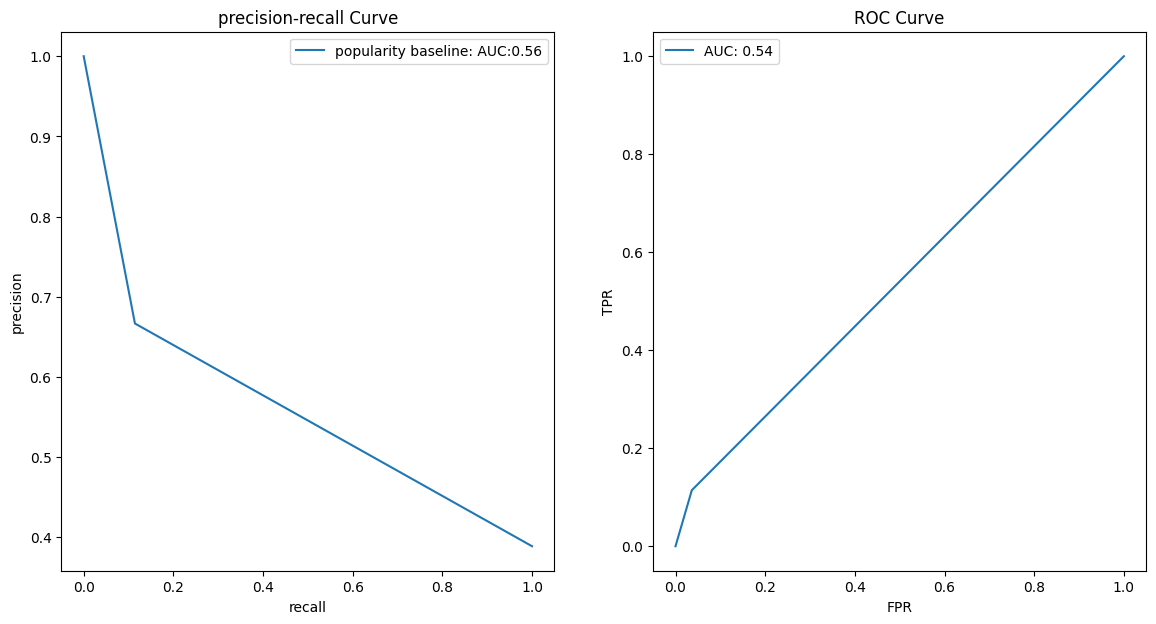

In [52]:
plot_metrics("popularity baseline", y_pred=y_test_pred_logReg, y_test=y_test)

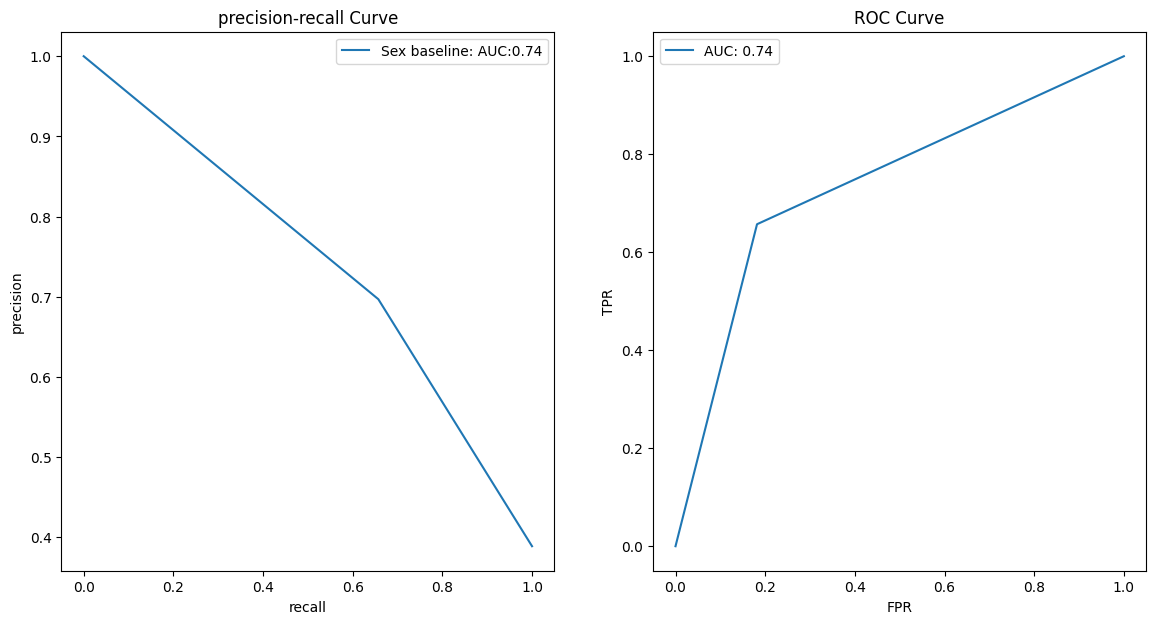

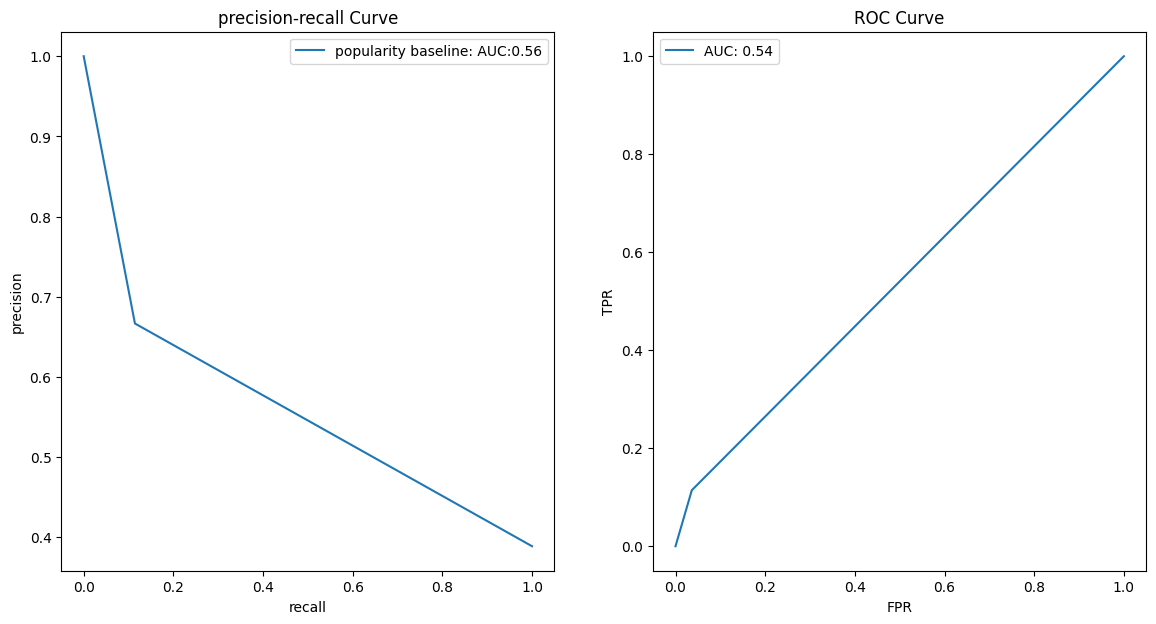

In [ ]:
plot_metrics("Sex baseline", y_pred=y_pred_baseline, y_test=y_test)
plot_metrics("popularity baseline", y_pred=y_test_pred_logReg, y_test=y_test)

### Kmeans

In [ ]:
model_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1)

In [67]:
# Realizamos la prediccion sobre los datos de test

y_test_pred_knn = model_knn.predict(X_test)
print("Evaluación en Validación:\n", classification_report(y_test, y_test_pred_knn))

Evaluación en Validación:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        55
           1       0.53      0.69      0.60        35

    accuracy                           0.64        90
   macro avg       0.64      0.65      0.64        90
weighted avg       0.67      0.64      0.65        90



In [68]:
cross_val_score(model_knn, X_train, y_train, cv=10).mean()

0.7875

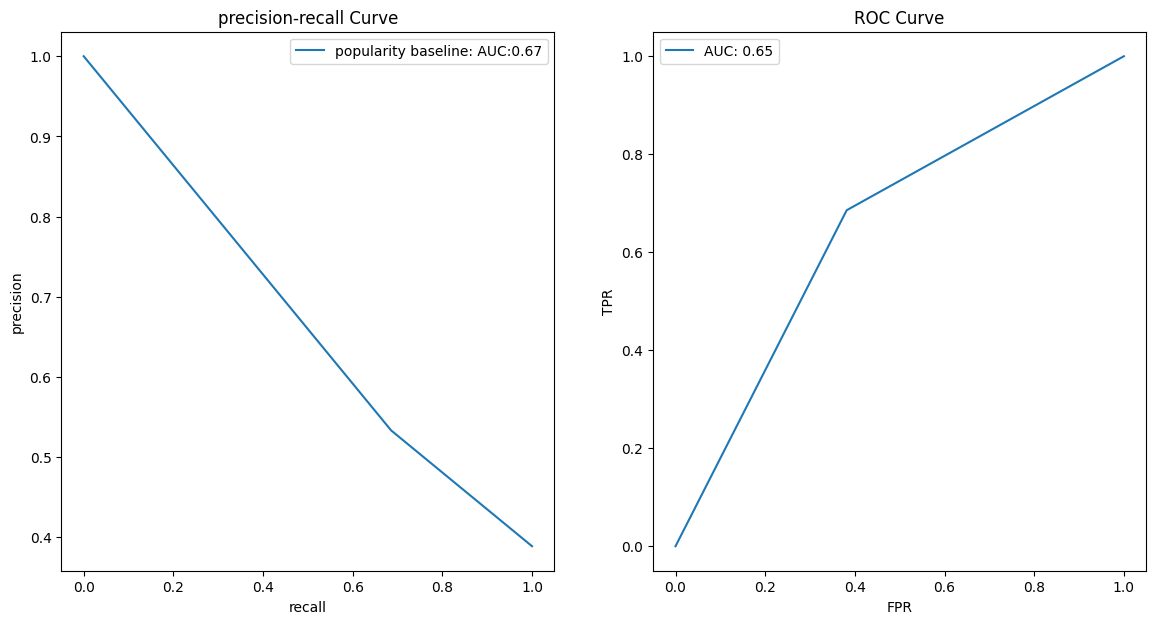

In [56]:
plot_metrics("popularity baseline", y_pred=y_test_pred_knn, y_test=y_test)

### Arbol de decision

In [70]:
model_tree=tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

model_tree.fit(X_train, y_train)

y_test_pred_tree = model_tree.predict(X_test)

In [80]:
print("Evaluación en Validación:\n", classification_report(y_test, y_test_pred_tree))

Evaluación en Validación:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        55
           1       0.00      0.00      0.00        35

    accuracy                           0.61        90
   macro avg       0.31      0.50      0.38        90
weighted avg       0.37      0.61      0.46        90



c:\Users\AULA04\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-qOtEqhAW-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AULA04\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-qOtEqhAW-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AULA04\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-qOtEqhAW-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [72]:
cross_val_score(model_tree, X_train, y_train, cv=10).mean()

0.803125

### Random Forest

In [74]:
modelo_rand_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='sqrt', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1, oob_score=False, random_state=None, verbose=0,warm_start=False)


modelo_rand_forest.fit(X_train, y_train)

# Realizamos la prediccion sobre los datos de test
y_test_pred_rand_forest = modelo_rand_forest.predict(X_test)

In [77]:
print("Evaluación en Validación:\n", classification_report(y_test, y_test_pred_rand_forest))

Evaluación en Validación:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46        55
           1       0.33      0.46      0.38        35

    accuracy                           0.42        90
   macro avg       0.43      0.43      0.42        90
weighted avg       0.45      0.42      0.43        90



In [78]:
cross_val_score(modelo_rand_forest, X_train, y_train, cv=10).mean()

0.8171875